In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

# I. LOAD DATA

In [2]:
train = pd.read_csv('./Data/train_clean.csv') 

In [3]:
train.head()

,Unnamed: 0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,AgeGarage
0,0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,...,None,0,2,2008,WD,Normal,208500,5,5,5.0
1,1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,...,None,0,5,2007,WD,Normal,181500,31,31,31.0
2,2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,...,None,0,9,2008,WD,Normal,223500,7,6,7.0
3,3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,...,None,0,2,2006,WD,Abnorml,140000,91,36,8.0
4,4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,...,None,0,12,2008,WD,Normal,250000,8,8,8.0


In [4]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('index', axis=1)

In [5]:
# I have to do this again
# Ensure these variabes are categorical
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)

#train['OverallQual'] = train['OverallQual'].astype(str)
#train['OverallCond'] = train['OverallCond'].astype(str)
#train['YearBuilt'] = train['YearBuilt'].astype(str)   
#train['YearRemodAdd'] = train['YearRemodAdd'].astype(str)
#train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)

In [6]:
train.shape[0]

1449

In [7]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,AgeGarage
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,None,0,2,2008,WD,Normal,208500,5,5,5.0
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,None,0,5,2007,WD,Normal,181500,31,31,31.0
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,None,0,9,2008,WD,Normal,223500,7,6,7.0
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,None,0,2,2006,WD,Abnorml,140000,91,36,8.0
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,None,0,12,2008,WD,Normal,250000,8,8,8.0


In [9]:
# Remove these, accounted for them with other AgeHome, YrsSinceRemodel, AgeGarage
train = train.drop('YearBuilt', axis=1)
train = train.drop('YearRemodAdd', axis=1)
train = train.drop('GarageYrBlt', axis=1)
train = train.drop('AgeGarage', axis=1) # missing info, 
                                        # and NoGarage information capture elsewhere

In [10]:
# train.info()

## The Variables

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numerical variables')
print(list(numlist))

34  numerical variables
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHome', 'YrsSinceRemodel']


In [12]:
cattypes = ['O']
cat_train = train.select_dtypes(include=cattypes)
catlist_all = list(cat_train)
print(len(catlist_all),' categorical variables')
print(catlist_all)

46  categorical variables
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


# II. Preprocessing 

#### 1. Separate the input and output variable(s): create new dataframes

In [13]:
# Remove 'SalePrice' and 'Id' from the numlist
numlist.remove('SalePrice')
numlist.remove('Id')

print(len(numlist),' numerical variables')
print(numlist)

32  numerical variables
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeHome', 'YrsSinceRemodel']


In [14]:
# Let's reduce the list of categorical variables
# For each variable, running an anova to determine 
      # if there is a significant difference in mean SalePrice 
      #  between the differenct options of the given variable
        
import statsmodels.api as sm
from statsmodels.formula.api import ols

catlist = list()

for cvar in catlist_all: 
    # Group Difference
    mstr = 'SalePrice ~ ' + cvar
    mod = ols(mstr,data=train).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    if aov_table['PR(>F)'][0] <= 0.01:
        catlist.append(cvar)

print('Original list had ', len(catlist_all),' categorical variables')
print('Reduced list has ', len(catlist),' categorical variables \n')
print(catlist)

Original list had  46  categorical variables
Reduced list has  39  categorical variables 

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [15]:
#catlist = ['ExterQual', 'BsmtQual', 'KitchenQual',
#          'Neighborhood', 'MSZoning','BsmtCond',
#          'CentralAir','PoolQC'] # testing

In [16]:
# CONCATENATE!! the numerical and categorical
inputs_vars = numlist + catlist
print(inputs_vars)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeHome', 'YrsSinceRemodel', 'MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [17]:
PriceFeatures = train[inputs_vars].copy()

In [18]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,Typ,NoFirePlace,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,Typ,Gd,Detchd,Unf,TA,TA,Y,NoFence,WD,Abnorml
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,Typ,TA,Attchd,RFn,TA,TA,Y,NoFence,WD,Normal


##### Which Columns Are Numeric? Need this information later.

In [19]:
nlist = list(PriceFeatures.select_dtypes('number'))
print('Numerical Column Names: \n', nlist)

num_indx = []
for nvar in nlist:
    num_indx.append(PriceFeatures.select_dtypes('number').columns.get_loc(nvar))
    
print('\nNumerical Columns Indices: \n', num_indx)

Numerical Column Names: 
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeHome', 'YrsSinceRemodel']

Numerical Columns Indices: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


##### The Dependent Variable 🎯

In [20]:
Price = train['SalePrice']

In [21]:
log_Price = np.log(train['SalePrice'])

SalePrice is right skewed (left plot).
For the output/dependent variable, the log of SalePrice taken.
This is so the residuals of a linear model would be normal.


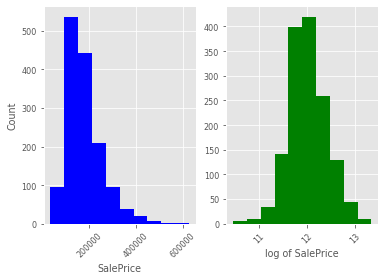

In [22]:
fig, axs = plt.subplots(1,2)   
axs[0].hist(Price,color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SalePrice')
    
axs[1].hist(log_Price,color='g')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('log of SalePrice')
print('SalePrice is right skewed (left plot).')
print('For the output/dependent variable, the log of SalePrice taken.')
print('This is so the residuals of a linear model would be normal.')

#### 2. Dummify the Categorical Variables

In [23]:
col_2_dummy = catlist
PriceFeatures = pd.get_dummies(PriceFeatures, 
                               columns=col_2_dummy, 
                               drop_first=True)

In [24]:
PriceFeatures.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


#### 3. Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    PriceFeatures, log_Price, test_size=0.2, 
    random_state=0)

In [26]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
476,105.0,13693,9,5,772.0,0,0,2153,2153,2069,...,0,0,0,0,1,0,0,0,1,0
528,85.0,10200,6,5,219.0,783,0,678,1461,1509,...,0,0,0,0,1,0,0,0,0,0
186,0.0,9947,7,5,0.0,611,0,577,1188,1217,...,0,0,0,0,1,0,0,0,1,0
156,60.0,7200,5,7,0.0,0,0,0,0,1040,...,0,0,0,0,1,0,0,0,1,0
312,65.0,7800,5,7,0.0,507,0,286,793,793,...,0,0,0,0,1,0,0,0,1,0


#### 4. Standardize the numerical variables

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

t = [('num', StandardScaler(), num_indx)]
transf = ColumnTransformer(transformers=t,
                           remainder='passthrough')

In [28]:
X_train_scaled = transf.fit_transform(X_train)
X_test_scaled = transf.transform(X_test)

In [29]:
X_train_scaled.shape

(1159, 256)

<ipython-input-30-3f0e3c5f6e20>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


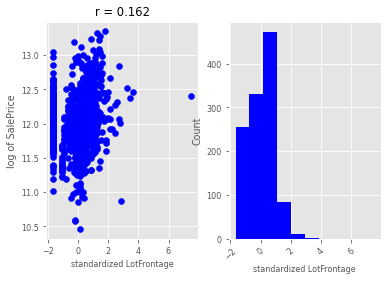

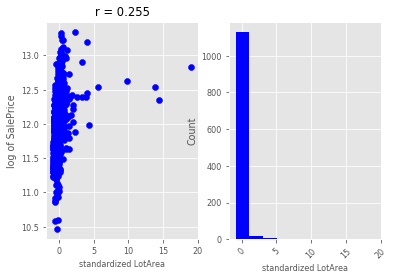

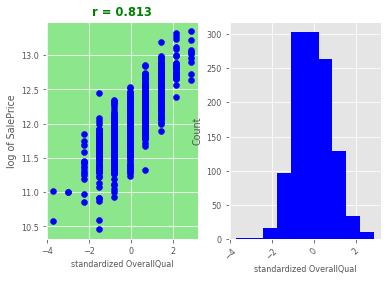

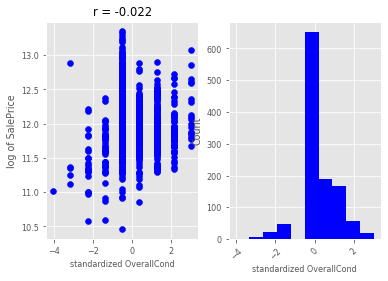

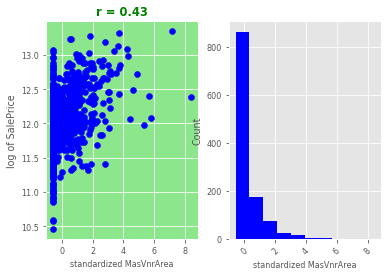

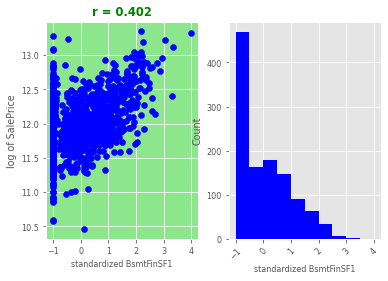

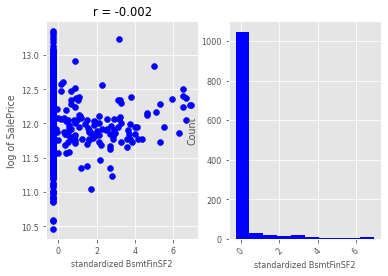

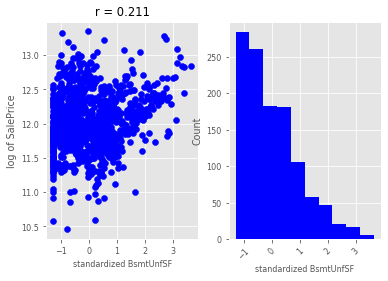

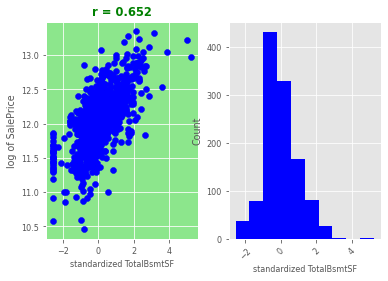

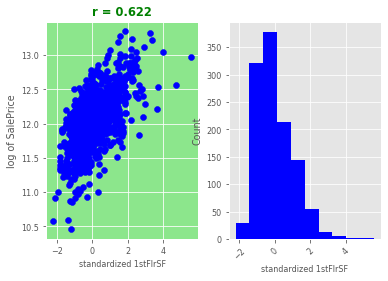

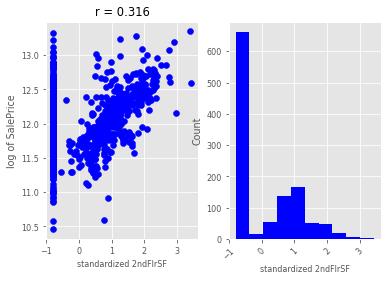

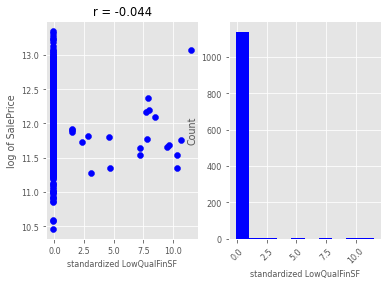

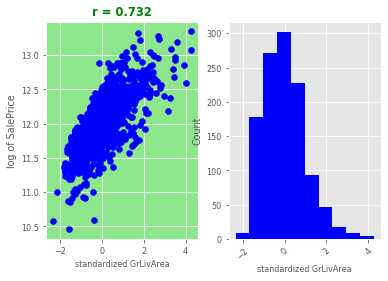

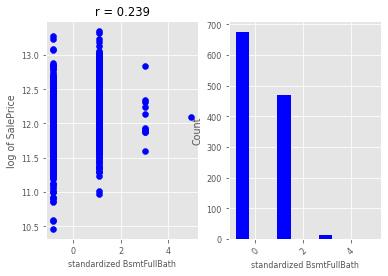

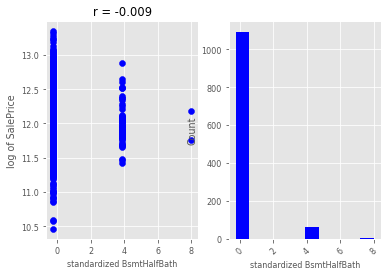

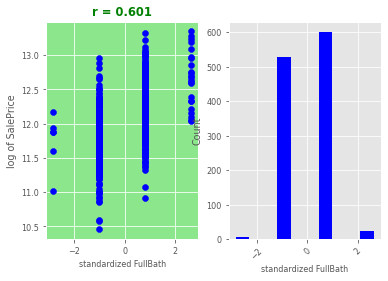

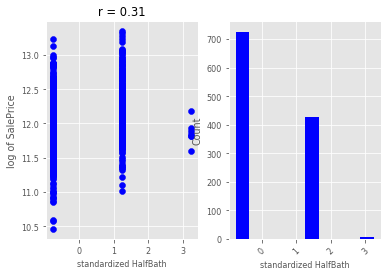

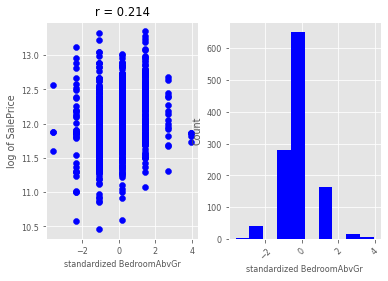

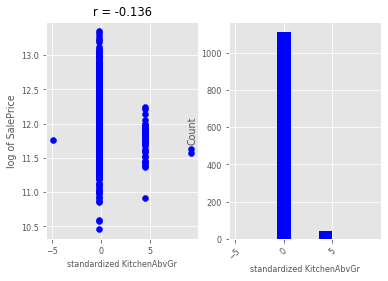

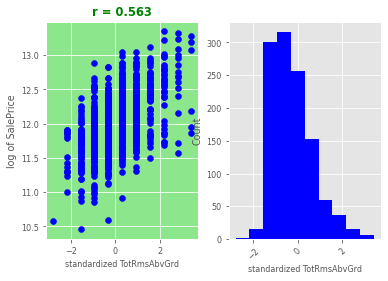

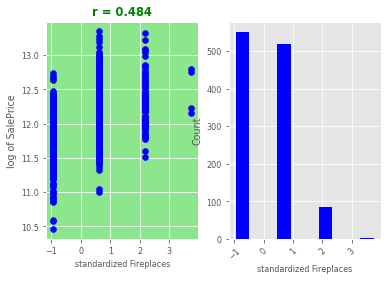

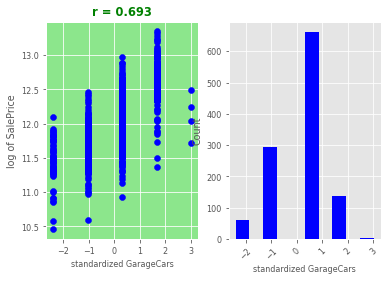

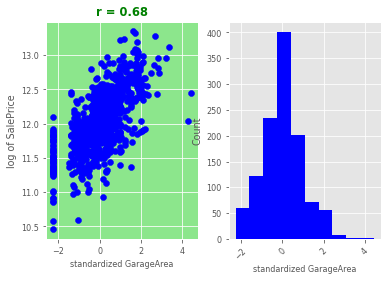

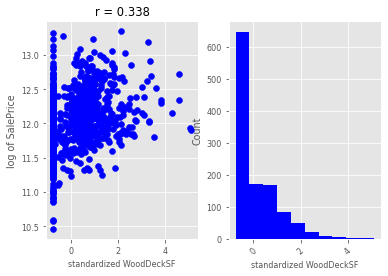

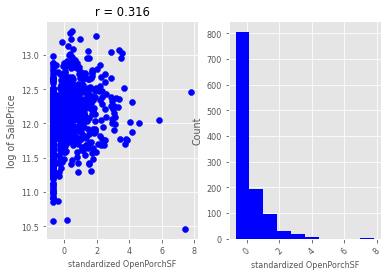

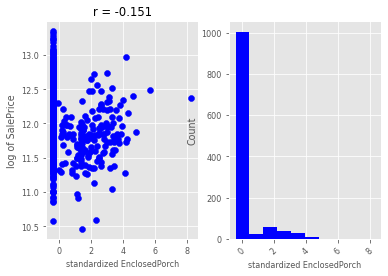

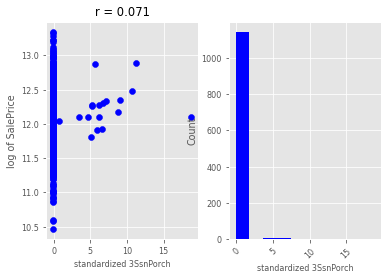

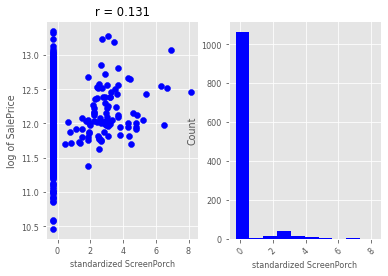

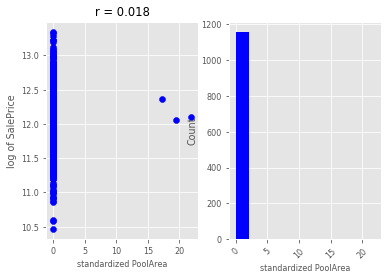

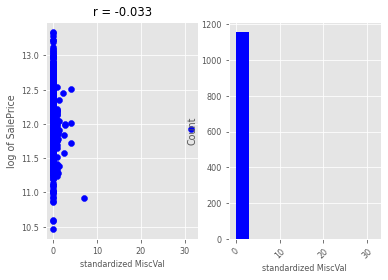

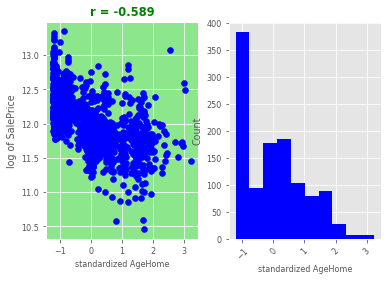

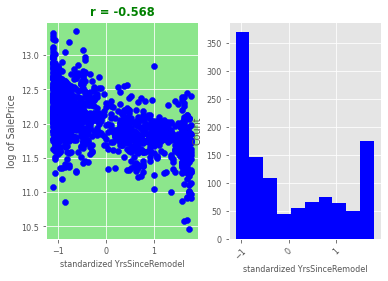

In [30]:
# plotting the standardized numerical variables vs.
     # log of SalePrice
    
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.4

fcnt = 0
for Feat in X_train.columns[num_indx]:
    fig, axs = plt.subplots(1,2) 
    x = X_train_scaled[:,fcnt]
    y = y_train
    
    axs[0].scatter(x,y,color='b')
    axs[0].set_xlabel('standardized ' + Feat,fontsize = 8)
    axs[0].set_ylabel('log of SalePrice')
    fcnt +=1
    
    r = ma.corrcoef(ma.masked_invalid(x), 
                ma.masked_invalid(y))
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        
    
    # Histogram
    axs[1].hist(x,color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel('standardized ' + Feat,fontsize = 8)

In [31]:
# initializing these variables for model comparision
model_descrp = []
r2_log_train = []
r2_log_test = []
rmse_log_train = []
rmse_log_test = []
rmse_train = []
rmse_test = []

# III. Train Models

## Baseline Model

In [32]:
# Predicting the mean of the dependent variable
y_pred_baseline = log_Price.mean()
print('Y Average: ', y_pred_baseline)

Y Average:  12.021729401954637


In [33]:
y_predTrain_baseline = [y_pred_baseline]*len(y_train)
y_predTest_baseline = [y_pred_baseline]*len(y_test)

##### Baseline Model ➡ Evaluation

RMSE Logarithmic Train:  0.39983421813790787
RMSE Logarithmic Test:  0.38217486322728855
RMSE Train: $ 79393.63057746341
RMSE Test: $ 72138.50878726842


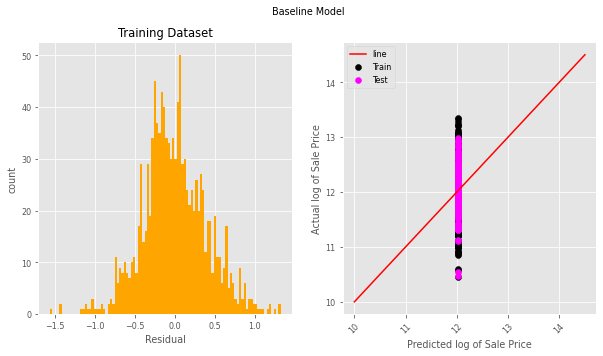

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_baseline_train = mean_squared_error(y_train, 
                                         y_predTrain_baseline, 
                                         squared = False)
rmse_baseline_test = mean_squared_error(y_test, 
                                         y_predTest_baseline, 
                                         squared = False)
print('RMSE Logarithmic Train: ', rmse_baseline_train)
print('RMSE Logarithmic Test: ', rmse_baseline_test)

# untransforming 
rmse_baseline_train_conv = mean_squared_error(np.exp(y_train), 
                                         np.exp(y_predTrain_baseline), 
                                         squared = False)
rmse_baseline_test_conv = mean_squared_error(np.exp(y_test), 
                                         np.exp(y_predTest_baseline), 
                                         squared = False)
print('RMSE Train: $', rmse_baseline_train_conv)
print('RMSE Test: $', rmse_baseline_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_baseline_train = y_train - y_predTrain_baseline
residuals_baseline_test = y_test - y_predTest_baseline

axs[0].hist(residuals_baseline_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(y_predTrain_baseline, 
         y_train, color='k')
axs[1].scatter(y_predTest_baseline, 
         y_test, color='magenta')

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('Baseline Model');

In [35]:
r2_log_train_temp = r2_score(y_train, y_predTrain_baseline)
r2_log_test_temp = r2_score(y_test, y_predTest_baseline)
rmse_log_train_temp = rmse_baseline_train
rmse_log_test_temp = rmse_baseline_test
rmse_train_temp = rmse_baseline_train_conv
rmse_test_temp = rmse_baseline_test_conv

model_descrp.append('baseline/null')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

## Model 1 : Multiple Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
print('R^2 for train is equal to %.3f' %(lm.score(X_train_scaled, y_train)))
print('R^2 for test is equal to %.3f' %(lm.score(X_test_scaled, y_test)))

R^2 for train is equal to 0.950
R^2 for test is equal to -57074568889663291392.000


##### Multiple Linear Regression Model ➡ Evaluation

RMSE Logarithmic Train:  0.08897625397013072
RMSE Logarithmic Test:  2886895990.435623
RMSE Train: $ 16412.298801338784


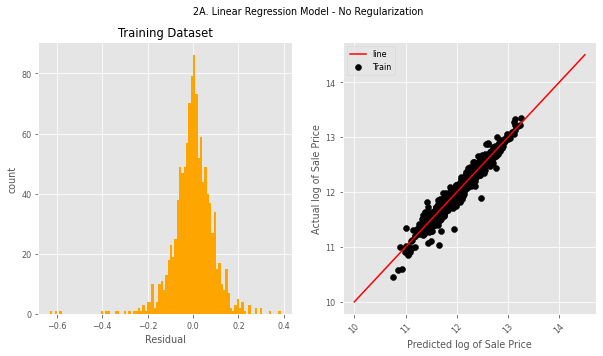

In [37]:
from sklearn.metrics import mean_squared_error
rmse_lm_train = mean_squared_error(y_train, 
                                lm.predict(X_train_scaled), 
                                squared = False)
rmse_lm_test = mean_squared_error(y_test, 
                                lm.predict(X_test_scaled), 
                                squared = False)

print('RMSE Logarithmic Train: ', rmse_lm_train)
print('RMSE Logarithmic Test: ', rmse_lm_test)

# untransforming 
rmse_lm_train_conv = mean_squared_error(np.exp(y_train), 
                                np.exp(lm.predict(X_train_scaled)), 
                                squared = False)
#rmse_lm_test_conv = mean_squared_error(np.exp(y_test), 
#                                np.exp(lm.predict(X_test_scaled)), 
#                                squared = False)

print('RMSE Train: $', rmse_lm_train_conv)
#print('RMSE Test: $', rmse_lm_test_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_lm_train = y_train - lm.predict(X_train_scaled)
residuals_lm_test = y_test - lm.predict(X_test_scaled)

axs[0].hist(residuals_lm_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(lm.predict(X_train_scaled), 
         y_train, color='k')
#axs[1].scatter(lm.predict(X_test_scaled), 
#         y_test, color='magenta') # OVERFITTED

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('2A. Linear Regression Model - No Regularization');

In [38]:
r2_log_train_temp = r2_score(y_train, lm.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, lm.predict(X_test_scaled))
rmse_log_train_temp = rmse_lm_train
rmse_log_test_temp = rmse_lm_test
rmse_train_temp = rmse_lm_train_conv
rmse_test_temp = np.nan

model_descrp.append('linear regression')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

In [39]:
pd.Series(lm.coef_, index=X_train.columns)

LotFrontage              0.002143
LotArea                  0.019539
OverallQual              0.047877
OverallCond              0.041307
MasVnrArea               0.003846
                           ...   
SaleCondition_AdjLand    0.103402
SaleCondition_Alloca     0.021420
SaleCondition_Family    -0.019333
SaleCondition_Normal     0.055775
SaleCondition_Partial   -0.262100
Length: 256, dtype: float64

## Model 2A : Lasso - No Grid Search 

Identifying a range of lambdas to look at in the following grid search.

In [40]:
from sklearn.linear_model import Lasso
lasso  = Lasso()
lasso.set_params(normalize=False)
lasso_scores_train = []
lasso_scores_test  = []

alphas = np.linspace(0.0001,0.05,100)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train_scaled, y_train)  
        coefs_lasso.append(lasso.coef_)
        
        lasso_scores_train.append(lasso.score(X_train_scaled, y_train))
        lasso_scores_test.append(lasso.score(X_test_scaled, y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = PriceFeatures.columns)  
# coefs_lasso.head()

In [41]:
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

lambda =  0.006148484848484849


Text(0, 0.5, '$R^2$')

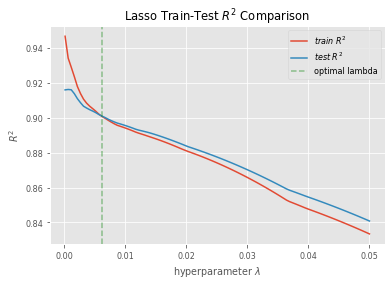

In [42]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')

lasso_underfit = lasso_scores_train < lasso_scores_test
first_underfit  = np.min(alphas[lasso_underfit])
print('lambda = ', first_underfit)
plt.axvline(first_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)

plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

## Model 2B : Lasso - Grid Search

In [43]:
from sklearn.linear_model import Lasso

# Grid Search 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

skfold = KFold(n_splits=3, shuffle=True, random_state=0)
lasso_gs  = Lasso()
lasso_gs.set_params(normalize=False)

params = {
    "alpha": [0.006]
}

gs = GridSearchCV(lasso_gs, params, scoring = 'neg_root_mean_squared_error', cv=skfold)
gs.fit(X_train_scaled, y_train)
gs.cv_results_['mean_test_score']

array([-0.12879383])

In [44]:
gs.best_estimator_

Lasso(alpha=0.006)

RMSE Logarithmic Train:  0.12572839517937712
RMSE Logarithmic Test:  0.12008085159086754
RMSE Train: $ 23476.07236868473


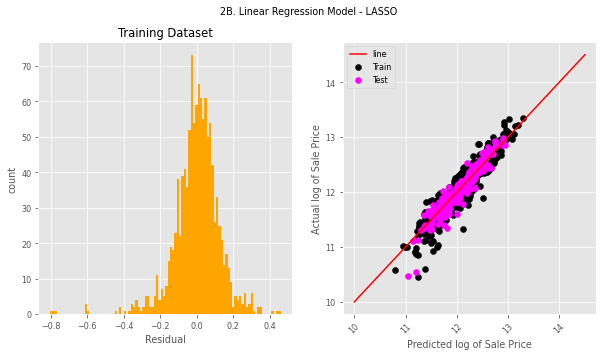

In [45]:
from sklearn.metrics import mean_squared_error
rmse_ls_train = mean_squared_error(y_train, 
                    gs.best_estimator_.predict(X_train_scaled), 
                    squared = False)
rmse_ls_test = mean_squared_error(y_test, 
                    gs.best_estimator_.predict(X_test_scaled), 
                    squared = False)
print('RMSE Logarithmic Train: ', rmse_ls_train)
print('RMSE Logarithmic Test: ', rmse_ls_test)

rmse_ls_train_conv = mean_squared_error(np.exp(y_train), 
                    np.exp(gs.best_estimator_.predict(X_train_scaled)), 
                    squared = False)
print('RMSE Train: $', rmse_ls_train_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_ls_train = y_train - gs.best_estimator_.predict(X_train_scaled)
residuals_ls_test = y_test - gs.best_estimator_.predict(X_test_scaled)

axs[0].hist(residuals_ls_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(gs.best_estimator_.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(gs.best_estimator_.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('2B. Linear Regression Model - LASSO');

In [46]:
r2_log_train_temp = r2_score(y_train, 
                 gs.best_estimator_.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, 
                gs.best_estimator_.predict(X_test_scaled))
rmse_log_train_temp = rmse_ls_train
rmse_log_test_temp = rmse_ls_test
rmse_train_temp = rmse_ls_train_conv
rmse_test_temp = np.nan

model_descrp.append('Lasso')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

In [47]:
pd.Series(gs.best_estimator_.coef_, index=PriceFeatures.columns)

LotFrontage              0.000905
LotArea                  0.020855
OverallQual              0.097194
OverallCond              0.048916
MasVnrArea               0.000000
                           ...   
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca    -0.000000
SaleCondition_Family    -0.000000
SaleCondition_Normal     0.000000
SaleCondition_Partial    0.000000
Length: 256, dtype: float64

In [48]:
gs.best_estimator_.intercept_

11.999336283303807

In [49]:
coefs = pd.DataFrame(
    gs.best_estimator_.coef_,
    columns=["Coefficients"],
    index=PriceFeatures.columns,
)

In [50]:
coefs['Magnitude'] = abs(coefs['Coefficients'])
coefs_sorted = coefs.sort_values('Magnitude', ascending = True)
coefs_sorted_nonzero = coefs_sorted.loc[coefs_sorted['Magnitude']>0.001]
coefs_sorted_nonzero = coefs_sorted_nonzero.drop('Magnitude', axis=1)
coefs_sorted_nonzero.head(10)

,Coefficients
1stFlrSF,0.001041
HalfBath,0.002207
WoodDeckSF,0.003905
FireplaceQu_Gd,0.006661
TotRmsAbvGrd,0.007305
BsmtFullBath,0.009554
KitchenAbvGr,-0.010091
HeatingQC_TA,-0.010213
ScreenPorch,0.011495
MSZoning_RM,-0.013726


In [51]:
coefs_sorted_nonzero.to_csv('./Data/lasso_coeff.csv')

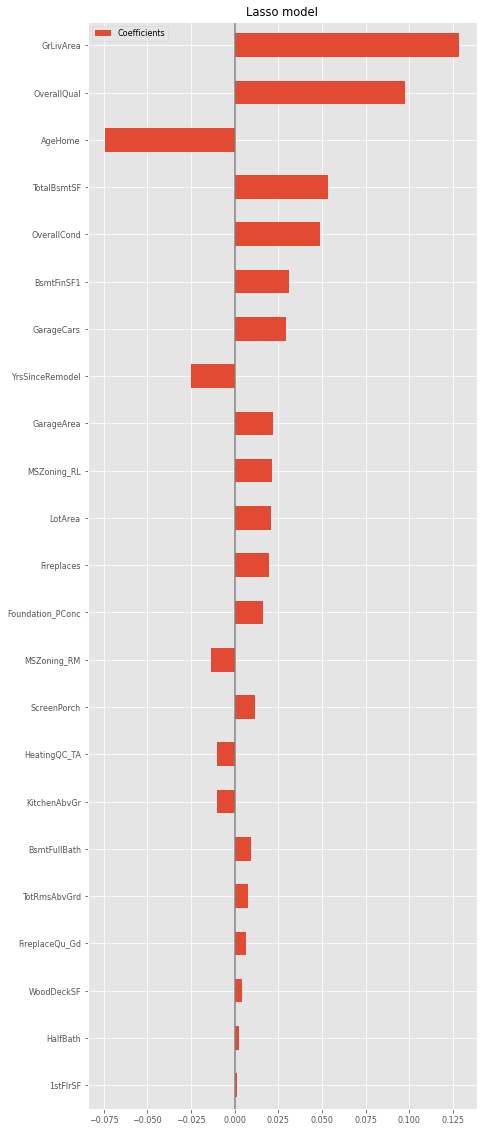

In [52]:
coefs_sorted_nonzero.plot(kind="barh", figsize=(9, 20))
plt.title("Lasso model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

## Model 3A : Random Forests - No Grid Search 

In [53]:
X_train_scaled.shape

(1159, 256)

In [54]:
np.sqrt(X_train_scaled.shape[1])

16.0

In [55]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
randomForest.get_params()

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
randomForest.set_params(random_state=42, 
                        n_estimators=100, 
                        max_features=16,
                        min_samples_split = 10)
randomForest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features=16, min_samples_split=10, random_state=42)

In [57]:
randomForest.score(X_train_scaled, y_train)

0.9445356612167867

In [58]:
randomForest.score(X_test_scaled, y_test)

0.8693243715555748

In [59]:
sorted_importance = sorted(zip(PriceFeatures, randomForest.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.09169515473954817),
 ('GrLivArea', 0.07365183393724267),
 ('GarageCars', 0.05143224817662778),
 ('AgeHome', 0.05056987234976347),
 ('TotalBsmtSF', 0.04936978131609286),
 ('YrsSinceRemodel', 0.046071821880713154),
 ('FullBath', 0.04577721678650192),
 ('1stFlrSF', 0.0426182431615394),
 ('GarageArea', 0.036035491500861994),
 ('ExterQual_TA', 0.03550053940305534),
 ('Fireplaces', 0.022640962891586333),
 ('TotRmsAbvGrd', 0.022052086537656626),
 ('LotArea', 0.02083190732240839),
 ('2ndFlrSF', 0.02070004547882309),
 ('ExterQual_Gd', 0.020085914492266776),
 ('BsmtFinSF1', 0.018988392646965724),
 ('Foundation_PConc', 0.016805588492654153),
 ('KitchenQual_TA', 0.015200448924080075),
 ('OpenPorchSF', 0.014339021802375975),
 ('FireplaceQu_NoFirePlace', 0.013567274798384077),
 ('MasVnrArea', 0.01334237559513687),
 ('BsmtQual_TA', 0.012313835140654171),
 ('MSSubClass_60', 0.011925222884532329),
 ('GarageFinish_Unf', 0.011694453158738844),
 ('GarageType_Attchd', 0.01126163262182233

RMSE Logarithmic Train:  0.09416378072359283
RMSE Logarithmic Test:  0.1381360763829824
RMSE Train: $ 20158.063501489898


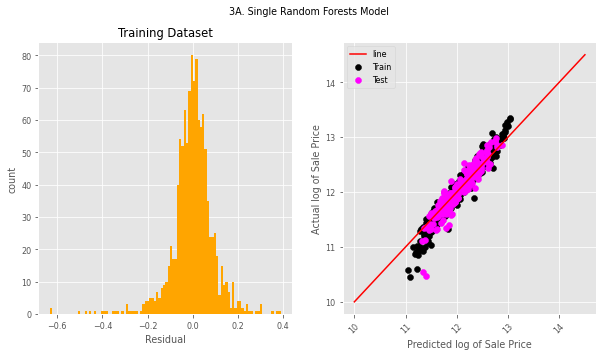

In [60]:
from sklearn.metrics import mean_squared_error
rmse_srf_train = mean_squared_error(y_train, 
            randomForest.predict(X_train_scaled), 
            squared = False)
rmse_srf_test = mean_squared_error(y_test, 
            randomForest.predict(X_test_scaled), 
            squared = False)

print('RMSE Logarithmic Train: ', rmse_srf_train)
print('RMSE Logarithmic Test: ', rmse_srf_test)

rmse_srf_train_conv = mean_squared_error(np.exp(y_train), 
            np.exp(randomForest.predict(X_train_scaled)), 
            squared = False)
print('RMSE Train: $', rmse_srf_train_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_srf_train = y_train - randomForest.predict(X_train_scaled)
residuals_srf_test = y_test - randomForest.predict(X_test_scaled)

axs[0].hist(residuals_srf_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(randomForest.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(randomForest.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('3A. Single Random Forests Model');

In [61]:
r2_log_train_temp = r2_score(y_train, 
                 randomForest.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, 
                randomForest.predict(X_test_scaled))
rmse_log_train_temp = rmse_srf_train
rmse_log_test_temp = rmse_srf_test
rmse_train_temp = rmse_srf_train_conv
rmse_test_temp = np.nan

model_descrp.append('Single RF')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

## Model 3B : Random Forests - Grid Search 

In [62]:
np.sqrt(X_train_scaled.shape[1])

16.0

In [64]:
# sklearn.metrics.SCORERS.keys()

In [65]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

gs_randomForest = ensemble.RandomForestRegressor()

grid_para_forest = [{
    "n_estimators": [100, 500],
    "max_features": [14, 16, 18],
    "min_samples_split":[2, 4, 6, 8, 10],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(gs_randomForest, 
                                  grid_para_forest, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 1.53 s, sys: 231 ms, total: 1.76 s
Wall time: 17.4 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [14, 16, 18],
                          'min_samples_split': [2, 4, 6, 8, 10],
                          'n_estimators': [100, 500], 'random_state': [42]}],
             scoring='neg_root_mean_squared_error')

In [66]:
# best parameters
grid_search_forest.best_params_

{'max_features': 18,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 42}

In [67]:
## best score
grid_search_forest.best_score_

-0.144003038130049

RMSE Logarithmic Train:  0.5028484988405761
RMSE Logarithmic Test:  0.5066704934779648
RMSE Train: $ 95790.62736660504


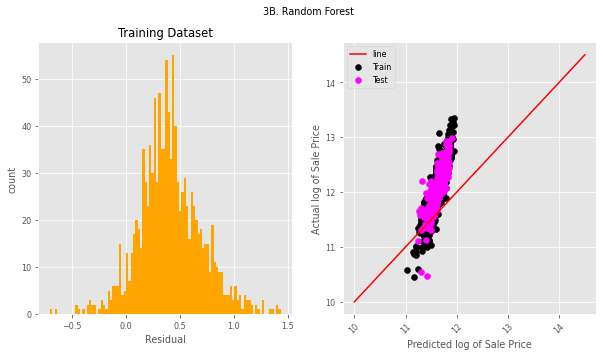

In [68]:
from sklearn.metrics import mean_squared_error
rmse_rf_train = mean_squared_error(y_train, 
    grid_search_forest.best_estimator_.predict(X_train_scaled), 
    squared = False)
rmse_rf_test = mean_squared_error(y_test, 
    grid_search_forest.best_estimator_.predict(X_test_scaled), 
    squared = False)

print('RMSE Logarithmic Train: ', rmse_rf_train)
print('RMSE Logarithmic Test: ', rmse_rf_test)

rmse_rf_train_conv = mean_squared_error(np.exp(y_train), 
    np.exp(grid_search_forest.best_estimator_.predict(X_train_scaled)), 
    squared = False)
print('RMSE Train: $', rmse_rf_train_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_rf_train = y_train - grid_search_forest.best_estimator_.predict(X_train_scaled)
residuals_rf_test = y_test - grid_search_forest.best_estimator_.predict(X_test_scaled)

axs[0].hist(residuals_rf_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(grid_search_forest.best_estimator_.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(grid_search_forest.best_estimator_.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('3B. Random Forest');

In [69]:
r2_log_train_temp = r2_score(y_train, 
        grid_search_forest.best_estimator_.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, 
        grid_search_forest.best_estimator_.predict(X_test_scaled))
rmse_log_train_temp = rmse_rf_train
rmse_log_test_temp = rmse_rf_test
rmse_train_temp = rmse_rf_train_conv
rmse_test_temp = np.nan

model_descrp.append('gs RF')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

## Model 4A : Gradient Boosting - No Grid Search

In [70]:
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [71]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
gbm.get_params()

Parameters currently in use:



{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [72]:
gbm.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [73]:
gbm.score(X_train_scaled, y_train)

0.9613347662494405

In [74]:
gbm.feature_importances_.sum()

1.0

In [75]:
sorted_importance = sorted(zip(PriceFeatures, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.4488385941079358),
 ('GrLivArea', 0.165398501635132),
 ('TotalBsmtSF', 0.06406222519990847),
 ('AgeHome', 0.05480683840501068),
 ('GarageCars', 0.04861793357811419),
 ('BsmtFinSF1', 0.028043783740603047),
 ('GarageArea', 0.024730662045534098),
 ('YrsSinceRemodel', 0.02342963545250351),
 ('LotArea', 0.019297415568961234),
 ('OverallCond', 0.01903252255457198),
 ('1stFlrSF', 0.009073971127349563),
 ('CentralAir_Y', 0.007602202767432855),
 ('Fireplaces', 0.006532343295769538),
 ('GarageCond_TA', 0.005740998553695055),
 ('FullBath', 0.005358686510262807),
 ('FireplaceQu_NoFirePlace', 0.005126723741202877),
 ('KitchenQual_TA', 0.00435134905352687),
 ('OpenPorchSF', 0.0034380878992898976),
 ('2ndFlrSF', 0.003315717978519403),
 ('MSZoning_RL', 0.003289783678982485),
 ('TotRmsAbvGrd', 0.0030383650219302847),
 ('Neighborhood_Crawfor', 0.0028796023708254287),
 ('BsmtExposure_Gd', 0.0028743104891404544),
 ('WoodDeckSF', 0.0027483556656434835),
 ('KitchenAbvGr', 0.00246887811808

RMSE Logarithmic Train:  0.07862076899913682
RMSE Logarithmic Test:  0.12491033031124393
RMSE Train: $ 14200.23121745249


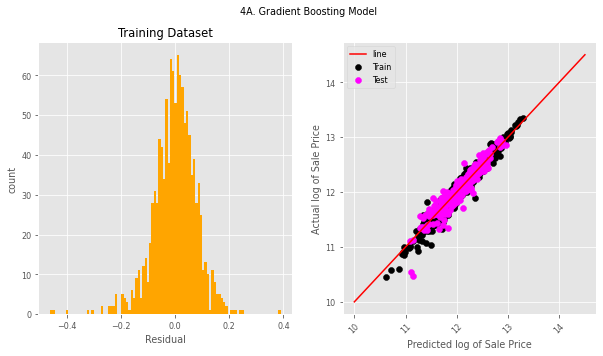

In [76]:
from sklearn.metrics import mean_squared_error
rmse_gbm_train = mean_squared_error(y_train, 
                gbm.predict(X_train_scaled), 
                squared = False)
rmse_gbm_test = mean_squared_error(y_test, 
                gbm.predict(X_test_scaled), 
                squared = False)

print('RMSE Logarithmic Train: ', rmse_gbm_train)
print('RMSE Logarithmic Test: ', rmse_gbm_test)

rmse_gbm_train_conv = mean_squared_error(np.exp(y_train), 
                np.exp(gbm.predict(X_train_scaled)), 
                squared = False)
print('RMSE Train: $', rmse_gbm_train_conv)

fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
residuals_gbm_train = y_train - gbm.predict(X_train_scaled)
residuals_gbm_test = y_test - gbm.predict(X_test_scaled)
axs[0].hist(residuals_gbm_train,bins=100, color = 'orange');
axs[0].set_ylabel('count')
axs[0].set_xlabel('Residual')
axs[0].set_title('Training Dataset')

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
axs[1].scatter(gbm.predict(X_train_scaled), 
         y_train, color='k')
axs[1].scatter(gbm.predict(X_test_scaled), 
         y_test, color='magenta') 

x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[1].plot(x,y, 'r-')

axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','Train','Test'])
fig.suptitle('4A. Gradient Boosting Model');

In [77]:
r2_log_train_temp = r2_score(y_train, 
                gbm.predict(X_train_scaled))
r2_log_test_temp = r2_score(y_test, 
                gbm.predict(X_test_scaled))
rmse_log_train_temp = rmse_gbm_train
rmse_log_test_temp = rmse_gbm_test
rmse_train_temp = rmse_gbm_train_conv
rmse_test_temp = np.nan

model_descrp.append('gbm')
if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
    r2_log_train.append(r2_log_train_temp)
elif r2_log_train_temp > 1:   
    r2_log_train.append(1000)
else:
    r2_log_train.append(-1000)

if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
    r2_log_test.append(r2_log_test_temp)
elif r2_log_test_temp > 1:   
    r2_log_test.append(1000)
else:
    r2_log_test.append(-1000)
    
if rmse_log_train_temp <= 10:
    rmse_log_train.append(rmse_log_train_temp)
elif rmse_log_train_temp > 10:   
    rmse_log_train.append(1000)

if rmse_log_test_temp <= 10:
    rmse_log_test.append(rmse_log_test_temp)
elif rmse_log_test_temp > 10:   
    rmse_log_test.append(1000)
    
rmse_train.append(rmse_train_temp)
rmse_test.append(rmse_test_temp)

# IV. Compare Model Results

In [78]:
pd.options.display.float_format = '{:,.2f}'.format
zipped = list(zip(model_descrp,
                 rmse_log_train, rmse_log_test, 
                 rmse_train, rmse_test,
                 r2_log_train, r2_log_test))

results = pd.DataFrame(zipped, columns=['model',
                                       'rmse log train',
                                       'rmse log test',
                                       'rmse train',
                                       'rmse test',
                                       'r2 train',
                                       'r2 test'])

#results.head(10)
results_sorted = results.sort_values('rmse log train', ascending = True)
results_sorted.head(10)

,model,rmse log train,rmse log test,rmse train,rmse test,r2 train,r2 test
5,gbm,0.08,0.12,"14,200.23",NaN,0.96,0.89
1,linear regression,0.09,"1,000.00","16,412.30",NaN,0.95,"-1,000.00"
3,Single RF,0.09,0.14,"20,158.06",NaN,0.94,0.87
2,Lasso,0.13,0.12,"23,476.07",NaN,0.90,0.90
0,baseline/null,0.40,0.38,"79,393.63","72,138.51","-1,000.00","-1,000.00"
4,gs RF,0.50,0.51,"95,790.63",NaN,"-1,000.00","-1,000.00"


(0.0, 150.0)

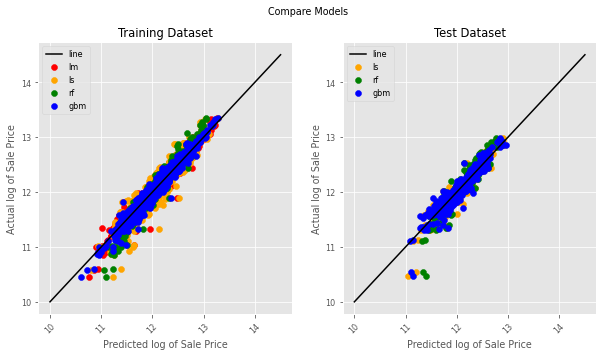

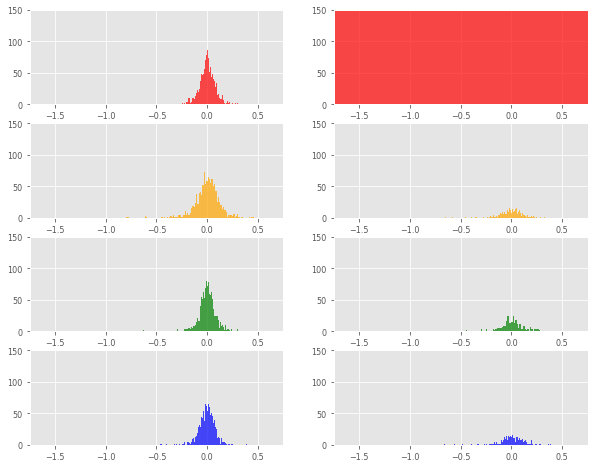

In [79]:
fig, axs = plt.subplots(1,2) 
fig.set_figheight(5)
fig.set_figwidth(10)

# --------------------------------
# Plot the Actual vs. Predicted
# --------------------------------
x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
axs[0].plot(x,y, 'k-')
axs[0].scatter(lm.predict(X_train_scaled), 
         y_train, color='red')
axs[0].scatter(gs.best_estimator_.predict(X_train_scaled), 
         y_train, color='orange')
axs[0].scatter(randomForest.predict(X_train_scaled), 
         y_train, color='green')
axs[0].scatter(gbm.predict(X_train_scaled), 
         y_train, color='blue')
axs[0].set_ylabel('Actual log of Sale Price')
axs[0].set_xlabel('Predicted log of Sale Price')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(['line','lm','ls','rf','gbm'])
axs[0].set_title('Training Dataset')

axs[1].plot(x,y, 'k-')
#axs[1].scatter(lm.predict(X_test_scaled), 
#         y_test, color='red')
axs[1].scatter(gs.best_estimator_.predict(X_test_scaled), 
         y_test, color='orange')
axs[1].scatter(randomForest.predict(X_test_scaled), 
         y_test, color='green')
axs[1].scatter(gbm.predict(X_test_scaled), 
         y_test, color='blue')
axs[1].set_ylabel('Actual log of Sale Price')
axs[1].set_xlabel('Predicted log of Sale Price')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend(['line','ls','rf','gbm'])
axs[1].set_title('Test Dataset')

fig.suptitle('Compare Models');

# -----------------------------------
# Plot the Residuals - Training Data
# -----------------------------------
fig2, axs2 = plt.subplots(4,2) 
fig2.set_figheight(8)
fig2.set_figwidth(10)

axs2[0,0].hist(residuals_lm_train,bins=100, 
                    color = 'red', alpha=0.7);
axs2[0,0].set_xlim(-1.75,0.75)
axs2[0,0].set_ylim(0,150)
axs2[1,0].hist(residuals_ls_train,bins=100, 
                    color = 'orange', alpha=0.7);
axs2[1,0].set_xlim(-1.75,0.75)
axs2[1,0].set_ylim(0,150)
axs2[2,0].hist(residuals_srf_train,bins=100, 
                    color = 'green', alpha=0.7);
axs2[2,0].set_xlim(-1.75,0.75)
axs2[2,0].set_ylim(0,150)
axs2[3,0].hist(residuals_gbm_train,bins=100, 
                    color = 'blue', alpha=0.7);
axs2[3,0].set_xlim(-1.75,0.75)
axs2[3,0].set_ylim(0,150)

axs2[0,1].hist(residuals_lm_test,bins=100, 
                    color = 'red', alpha=0.7);
axs2[0,1].set_xlim(-1.75,0.75)
axs2[0,1].set_ylim(0,150)
axs2[1,1].hist(residuals_ls_test,bins=100, 
                    color = 'orange', alpha=0.7);
axs2[1,1].set_xlim(-1.75,0.75)
axs2[1,1].set_ylim(0,150)
axs2[2,1].hist(residuals_srf_test,bins=100, 
                    color = 'green', alpha=0.7);
axs2[2,1].set_xlim(-1.75,0.75)
axs2[2,1].set_ylim(0,150)
axs2[3,1].hist(residuals_gbm_test,bins=100, 
                    color = 'blue', alpha=0.7);
axs2[3,1].set_xlim(-1.75,0.75)
axs2[3,1].set_ylim(0,150)
#axs2[0].legend(['lm','ls','rf','gbm'])
#axs2[0].set_ylabel('count')
#axs2[0].set_xlabel('Residual')
#axs2[0].set_title('Training Dataset - Residuals')